# LET US IMPLEMENT WHAT WE LEARNT ON A DATASET

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [2]:
data = pd.read_csv('Airlines.csv')
data

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1


In [3]:
# We will take only int64 columns for our simplicity and drop the rest.

columns = ["DayOfWeek", "Time", "Length", "Delay"]
data = data[columns]
data

,DayOfWeek,Time,Length,Delay
0,3,15,205,1
1,3,15,222,1
2,3,20,165,1
3,3,20,195,1
4,3,30,202,0
...,...,...,...,...
539378,5,1439,326,0
539379,5,1439,305,0
539380,5,1439,255,0
539381,5,1439,313,1


In [4]:
data.describe()

,DayOfWeek,Time,Length,Delay
count,539383.000000,539383.000000,539383.000000,539383.000000
mean,3.929668,802.728963,132.202007,0.445442
std,1.914664,278.045911,70.117016,0.497015
min,1.000000,10.000000,0.000000,0.000000
25%,2.000000,565.000000,81.000000,0.000000
50%,4.000000,795.000000,115.000000,0.000000
75%,5.000000,1035.000000,162.000000,1.000000
max,7.000000,1439.000000,655.000000,1.000000


In [5]:
data["Delay"].value_counts()   # Flight is either delayed or not. Data is balanced.

0    299119
1    240264
Name: Delay, dtype: int64

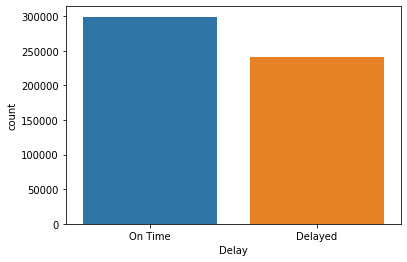

In [6]:
ax = sns.countplot(x = "Delay",data= data, saturation=0.8)
plt.xticks(ticks=[0, 1], labels = ["On Time", "Delayed"])
plt.show()

In [7]:
x = data.drop("Delay", axis = 1) # axis = 1 removes column and axis = 0 removes row from dataset
y = data["Delay"]
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.9,test_size = 0.1, random_state=1)
print("x: ",x.shape,x_train.shape, x_test.shape)
print("y: ",y_train.shape, y_test.shape)

print('x shape : ', x.shape)
print('x train shape and x test shape : ' ,x_train.shape, x_test.shape)
print('y shape : ', y.shape)
print('y train shape and y test shape : ' ,y_train.shape, y_test.shape)

x:  (539383, 3) (485444, 3) (53939, 3)
y:  (485444,) (53939,)
x shape :  (539383, 3)
x train shape and x test shape :  (485444, 3) (53939, 3)
y shape :  (539383,)
y train shape and y test shape :  (485444,) (53939,)


# Define Sigmoid Neuron Class

In [8]:
class SigmoidNeuron:
    def __init__(self, learnRate=0.01, iterations = 100):
        self.b = None   # bias
        self.W = None   # weight
        self.lr = learnRate
        self.iters = iterations
        self.error = None
        
    def sigmoid(self,x):
        return 1.0/(1.0 + np.exp(-x))
    
    def predict(self, X):
        y_pred = []
        for index in range(len(X)):
            x=X.iloc[index]
            linear_output = np.dot(x, self.W) + self.b
            y_predicted = self.sigmoid(linear_output)
            y_pred.append(y_predicted)
        return y_pred
        
    def gradDesc(self, X, Y):
        self.b = 0
        n_features = X.shape[1]
        print("n_features", n_features)
        self.W = np.zeros(n_features)
        
        y_ = np.array([1 if i>0 else 0 for i in Y]) # Labels are 0 or 1
        
        self.error = []
        
        # Converges ??
        for itr in range(self.iters):
            # Calculate every epoch
            grad_w = 0
            grad_b = 0
            loss = 0
            for index in range(len(X)):
                x=X.iloc[index]
                linear_output = np.dot(x, self.W) + self.b  
                y_predicted = self.sigmoid(linear_output)
                yhat = y_predicted
                
                y= Y.iloc[index]
                grad_w += (yhat - y)*yhat*(1-yhat)*np.dot(np.ones(n_features), x)
                grad_b += (yhat - y)*yhat*(1-yhat)
                
                loss += (yhat - y)**2   # Loss per epovh
            self.error.append(0.5 * loss) 
            # print("Loss: ", 0.5 * loss)
            
            #Update weight and bias
            for i in range(n_features):
                self.W[i] -= self.lr*grad_w
            self.b -= self.lr*grad_b  
            # print("Weigt: ", self.W)
            # print("Bias: ", self.b)
            

In [9]:
sn = SigmoidNeuron(learnRate = 0.5, iterations=5)
sn.gradDesc(x_train,y_train)

n_features 3


/tmp/ipykernel_46681/1604916641.py:10: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))


In [10]:
def getAccuracy(y_test, y_pred):
    accuracy = np.sum(y_test == y_pred) / len(y_test)
    return accuracy

In [11]:
prediction = sn.predict(x_test)
print("Accuracy: ",getAccuracy(y_test, prediction))

/tmp/ipykernel_46681/1604916641.py:10: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))


Accuracy:  0.5558872059177961
